In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as mplpl
import seaborn as sb

### `Data Preprocessing`

In [4]:
df = pd.read_csv("India Agriculture Crop Production.csv")
df.head(5)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [6]:
print(df['Year'].value_counts())

Year
2019-20    19296
2018-19    18302
2017-18    18008
2016-17    17418
2015-16    16339
2013-14    16178
2011-12    16132
2014-15    15587
2009-10    15341
2012-13    15279
2008-09    15150
2010-11    14889
2007-08    14681
2006-07    14678
2003-04    14662
2002-03    14182
2004-05    14151
2005-06    14063
2000-01    13593
2001-02    13307
1999-00    13013
1998-99    12290
1997-98     8549
2020-21      319
Name: count, dtype: int64


In [7]:
df['Year'] = df['Year'].str[:4].astype(int)


In [12]:
districts_by_state_dict = df.groupby('State')['District'].unique().apply(list).to_dict()
print(districts_by_state_dict)

{'Andaman and Nicobar Islands': ['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS', 'Andaman and Nicobar Islands'], 'Andhra Pradesh': ['ANANTAPUR', 'EAST GODAVARI', 'KRISHNA', 'VIZIANAGARAM', 'WEST GODAVARI', 'ADILABAD', 'CHITTOOR', 'GUNTUR', 'KADAPA', 'KARIMNAGAR', 'KHAMMAM', 'KURNOOL', 'MAHBUBNAGAR', 'MEDAK', 'NALGONDA', 'NIZAMABAD', 'PRAKASAM', 'RANGAREDDI', 'SPSR NELLORE', 'SRIKAKULAM', 'VISAKHAPATANAM', 'WARANGAL', 'HYDERABAD'], 'Arunachal Pradesh': ['CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG', 'KURUNG KUMEY', 'LOHIT', 'LOWER DIBANG VALLEY', 'LOWER SUBANSIRI', 'PAPUM PARE', 'TAWANG', 'TIRAP', 'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG', 'ANJAW', 'KRA DAADI', 'LONGDING', 'NAMSAI', 'SIANG', 'KAMLE', 'LOWER SIANG', 'LEPARADA', 'PAKKE KESSANG', 'SHI YOMI'], 'Assam': ['BARPETA', 'BONGAIGAON', 'CACHAR', 'DARRANG', 'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA', 'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG', 'KARIMGANJ', 

In [7]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2000, 1997,
       1998, 1999])

In [8]:
df['Year'].value_counts()

Year
2019    19296
2018    18302
2017    18008
2016    17418
2015    16339
2013    16178
2011    16132
2014    15587
2009    15341
2012    15279
2008    15150
2010    14889
2007    14681
2006    14678
2003    14662
2002    14182
2004    14151
2005    14063
2000    13593
2001    13307
1999    13013
1998    12290
1997     8549
2020      319
Name: count, dtype: int64

In [9]:
# Removing rows where year is 1997 and 2020 as data seems to be incomplete for the following year.
df = df.drop(df[(df['Year'] == '1997') | (df['Year'] == '2020')].index)
print(f"The number of rows remaining are {df.shape[0]}.")

The number of rows remaining are 345407.


In [10]:
## Checking for null values in the dataset
df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [11]:
#removing null values from the dataset
df=df.dropna()
print('checking for null values after removing null values')
print(df.isnull().sum())
print(f"The number of rows remaining are {df.shape[0]}.")

checking for null values after removing null values
State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64
The number of rows remaining are 340414.


In [12]:
print(df['Production Units'].unique())
print(df['Area Units'].unique())

['Tonnes' 'Nuts' 'Bales']
['Hectare']


Here all the area units in `hectare` but the production units are not same (`Tonnes , Nuts , Bales`) so we need to convert them into same units i.e i am converting them into `tonnes`

Considering 1 Kg = 10 coconuts then 1 Tonne = 10,000 Cocunts or 1 Nut = 0.0001 Tonne

1 Bale = 0.22 Tonne or 1 Tonne = 4.6 Bales

In [13]:
# Converting Production Units to Tonnes
df['Production_in_tonnes'] = df.apply(
    lambda row: row['Production'] * 0.0001 if row['Production Units'] == 'Nuts' else
                row['Production'] * 0.22 if row['Production Units'] == 'Bales' else
                row['Production'],
    axis=1
)


In [14]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,Production_in_tonnes
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,2061.0
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803,2083.0
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358,1525.0
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000,5239.0
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296,5267.0


In [15]:
print(f'number of unique crops in the dataset: {df["Crop"].nunique()}')
print(f'number of unique states in the dataset: {df["State"].nunique()}')
print(f'number of unique districts in the dataset: {df["District"].nunique()}')
print(f'number of unique seasons in the dataset: {df["Season"].nunique()}')

number of unique crops in the dataset: 56
number of unique states in the dataset: 36
number of unique districts in the dataset: 728
number of unique seasons in the dataset: 6


In [16]:
df["Season"].unique()

array(['Kharif', 'Whole Year', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [17]:
#we changed the the untins so we need to also need to chane the yeild 
df = df.drop('Yield',axis = 1)
df['Yield'] = df['Production_in_tonnes'] / df['Area']


In [18]:
df.head(5)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Production_in_tonnes,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001,Kharif,1254.0,Hectare,2061.0,Tonnes,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002,Whole Year,1258.0,Hectare,2083.0,Tonnes,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003,Whole Year,1261.0,Hectare,1525.0,Tonnes,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001,Kharif,3100.0,Hectare,5239.0,Tonnes,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002,Whole Year,3105.0,Hectare,5267.0,Tonnes,5267.0,1.696296


In [19]:
new_df = df.drop(['Production Units', 'Area Units','Production'], axis=1)

In [20]:
new_df.head()

,State,District,Crop,Year,Season,Area,Production_in_tonnes,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001,Kharif,1254.0,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002,Whole Year,1258.0,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003,Whole Year,1261.0,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001,Kharif,3100.0,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002,Whole Year,3105.0,5267.0,1.696296


In [21]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['State', 'District', 'Crop', 'Season']
df_encoded = pd.get_dummies(new_df, columns=categorical_cols, drop_first=True)


In [22]:
new_df.head()

,State,District,Crop,Year,Season,Area,Production_in_tonnes,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001,Kharif,1254.0,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002,Whole Year,1258.0,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003,Whole Year,1261.0,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001,Kharif,3100.0,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002,Whole Year,3105.0,5267.0,1.696296


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'Area' column
new_df['Area'] = scaler.fit_transform(new_df[['Area']])

# Display the first few rows to verify
new_df.head()

,State,District,Crop,Year,Season,Area,Production_in_tonnes,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001,Kharif,0.000146,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002,Whole Year,0.000147,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003,Whole Year,0.000147,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001,Kharif,0.000361,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002,Whole Year,0.000362,5267.0,1.696296


In [24]:
# Normalize the 'Production_in_tonnes' column
new_df['Production_in_tonnes'] = scaler.fit_transform(new_df[['Production_in_tonnes']])

# Display the first few rows to verify
new_df.head()

,State,District,Crop,Year,Season,Area,Production_in_tonnes,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001,Kharif,0.000146,0.000100,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002,Whole Year,0.000147,0.000101,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003,Whole Year,0.000147,0.000074,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001,Kharif,0.000361,0.000253,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002,Whole Year,0.000362,0.000255,1.696296


In [25]:
new_df['Yield']= new_df["Yield"].round(2)

In [26]:
# Combine data by grouping on Crop and other relevant columns, excluding Year
combined_df = new_df.groupby(['Crop', 'Season', 'State', 'District'], as_index=False).agg({
    'Area': 'sum',
    'Production_in_tonnes': 'sum',
    'Yield': 'mean'
})

combined_df.head()

,Crop,Season,State,District,Area,Production_in_tonnes,Yield
0,Arecanut,Autumn,Andaman and Nicobar Islands,Andaman and Nicobar Islands,0.000967,0.000299,0.745
1,Arecanut,Kharif,Andaman and Nicobar Islands,Andaman and Nicobar Islands,0.000284,0.000165,1.400
2,Arecanut,Kharif,Andaman and Nicobar Islands,NICOBARS,0.000292,0.000196,1.615
3,Arecanut,Kharif,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,0.000723,0.000504,1.685
4,Arecanut,Kharif,Andhra Pradesh,ANANTAPUR,0.000559,0.001122,4.100


                          Area  Production_in_tonnes     Yield
Area                  1.000000              0.290082 -0.008255
Production_in_tonnes  0.290082              1.000000  0.163716
Yield                -0.008255              0.163716  1.000000


<Axes: >

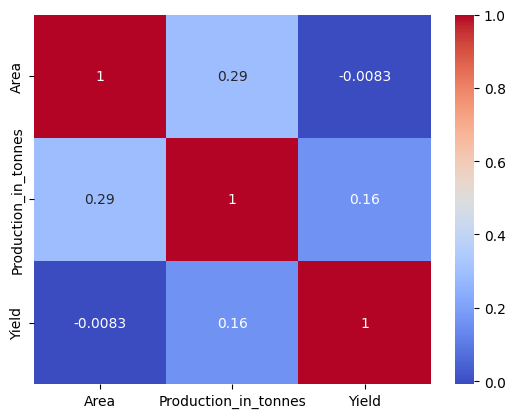

In [27]:
# 1. Check Correlation Matrix

correlation_matrix = combined_df.select_dtypes(include=['number','float']).corr()
print(correlation_matrix)
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# 2. Split the Data into Features and Target Variable
X = combined_df.drop(['Yield','Production_in_tonnes'], axis=1)  # Features
y = combined_df['Yield']  # Target variable

# Encode categorical columns
label_encoder_state = LabelEncoder()
label_encoder_district = LabelEncoder()

X['State'] = label_encoder_state.fit_transform(X['State'])
X['District'] = label_encoder_district.fit_transform(X['District'])
X['Crop'] = label_encoder_state.fit_transform(X['Crop'])
X['Season'] = label_encoder_state.fit_transform(X['Season'])

# Re-split the data after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.head()

,Crop,Season,State,District,Area
1603,2,1,30,670,0.013894
31442,50,4,16,113,0.000008
10422,20,2,16,57,0.005192
872,1,1,33,617,0.015932
12799,25,1,16,357,0.006997


R^2 Score: 0.6302808061703806
Accuracy: 0.6302808061703806
Mean Squared Error: 40.316733200148775
Feature ranking:
1. Area (0.2883441415602165)
2. Crop (0.2741477881632187)
3. State (0.2671138205276571)
4. District (0.14088692147237808)
5. Season (0.029507328276529566)


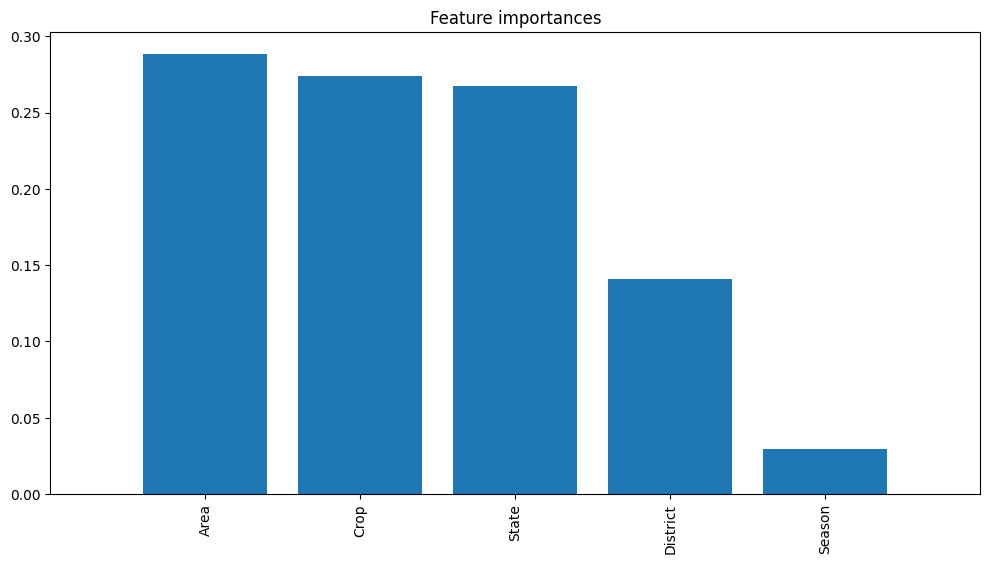

['random_forest_model.pkl']

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



# 4. Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 5. Fit the Model to the Training Data
rf_model.fit(X_train, y_train)

# 6. Make Predictions on the Test Data
y_pred = rf_model.predict(X_test)

# 7. Evaluate the Model
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")
accuracy = rf_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")
# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
# 8. Save the Model
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

In [31]:
accuracy_percentage = r2 * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 63.03%


In [33]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [ 2, 4]
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                   param_distributions=param_grid,
                                   cv=5, n_iter=20, scoring='r2', n_jobs=-1)
random_search.fit(X_train, y_train)
print("Best R² Score:", random_search.best_score_)
best_model = random_search.best_estimator_


c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best R² Score: 0.45816144878668724


In [34]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [41]:
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8194675823159276


In [42]:
joblib.dump(best_model, 'random_forest_best_model.pkl')

['random_forest_best_model.pkl']

In [50]:
def predict_yield(crop, state, district, area, season):
    # Load the model
    model = joblib.load('random_forest_best_model.pkl')

    # Encode the input data
    # Check if the input labels exist in the encoder's classes
    if state not in label_encoder_state.classes_:
        label_encoder_state.classes_ = np.append(label_encoder_state.classes_, state)
    if district not in label_encoder_district.classes_:
        label_encoder_district.classes_ = np.append(label_encoder_district.classes_, district)
    if crop not in label_encoder_state.classes_:
        label_encoder_state.classes_ = np.append(label_encoder_state.classes_, crop)
    if season not in label_encoder_state.classes_:
        label_encoder_state.classes_ = np.append(label_encoder_state.classes_, season)

    # Transform the input labels
    state_encoded = label_encoder_state.transform([state])[0]
    district_encoded = label_encoder_district.transform([district])[0]
    crop_encoded = label_encoder_state.transform([crop])[0]
    season_encoded = label_encoder_state.transform([season])[0]

    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Crop': [crop_encoded],
        'Season': [season_encoded],
        'State': [state_encoded],
        'District': [district_encoded],
        'Area': [area]
    })

    # Reorder columns to match the training data
    input_data = input_data[X.columns]

    # Make prediction
    predicted_yield = model.predict(input_data)
    return predicted_yield[0]
# Example usage 
predicted_yield = predict_yield(crop='Rice', state='Andhra Pradesh', district='KRISHNA', area=1000, season='Kharif')
print(f"Predicted Yield: {predicted_yield:.2f} tonnes per hectare")

Predicted Yield: 0.85 tonnes per hectare


In [43]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.6724505092576281
Accuracy: 0.6724505092576281


In [37]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6724505092576281
